In [3]:
import os
import glob
from tqdm import tqdm 
from pathlib import Path
import nibabel as nib
import numpy as np
import json
import pandas as pd

In [9]:
bvals = open('/home-local/pipelines/francois_special/INPUTS/dwmri.bval')

In [10]:
for line in bvals:
    data = line.split()
    print(data)

['0.0000000', '1000.0000000', '2000.0000000', '3005.0000000', '995.0000000', '2995.0000000', '2005.0000000', '990.0000000', '1990.0000000', '2995.0000000', '1000.0000000', '1990.0000000', '2990.0000000', '1005.0000000', '1995.0000000', '2995.0000000', '0.0000000', '995.0000000', '2000.0000000', '3010.0000000', '3005.0000000', '995.0000000', '2010.0000000', '995.0000000', '1990.0000000', '2990.0000000', '1000.0000000', '2000.0000000', '3005.0000000', '995.0000000', '1995.0000000', '2985.0000000', '0.0000000', '3005.0000000', '995.0000000', '2005.0000000', '990.0000000', '1985.0000000', '2990.0000000', '995.0000000', '2985.0000000', '1995.0000000', '3005.0000000', '995.0000000', '2005.0000000', '1000.0000000', '1990.0000000', '2995.0000000', '0.0000000', '1005.0000000', '2005.0000000', '2995.0000000', '2995.0000000', '1010.0000000', '1985.0000000', '1005.0000000', '2990.0000000', '2005.0000000', '995.0000000', '1990.0000000', '3005.0000000', '995.0000000', '2990.0000000', '1995.0000000',

In [20]:
shells = []
for bv in data:
    if bv != '0.0000000':
        shells.append(bv)

In [22]:
shells = sorted(shells)

In [23]:
shells

['1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1000.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1005.0000000',
 '1010.0000000',
 '1985.0000000',
 '1985.0000000',
 '1985.0000000',
 '1990.0000000',
 '1990.0000000',
 '1990.0000000',
 '1990.0000000',
 '1990.0000000',
 '1990.0000000',
 '1990.0000000',
 '1990.0000000',
 '1990.0000000

In [24]:
for zer in data:
    if zer == '0.0000000':
        print(zer)

0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000
0.0000000


In [25]:
"""
270 directions excluding the b0 values.
"""

'\n'

In [26]:
img= nib.load('/home-local/pipelines/francois_special/INPUTS/dwmri.nii.gz')

In [28]:
header = img.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 145 174 145 288   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    1.25  1.25  1.25  1.    1.    1.    1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.4:ddd0a010'
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_

In [29]:
print(header.get_data_shape())

(145, 174, 145, 288)


In [30]:
print(header.get_zooms())

(1.25, 1.25, 1.25, 1.0)


In [32]:
#Check out the connectivity matrices:
data = np.load('/home-local/pipelines/francois_special/OUTPUTS/connectivity_matrices/subject_session__fa.npy')


In [34]:
data.shape

(125, 125)

In [35]:
type(data)

numpy.ndarray

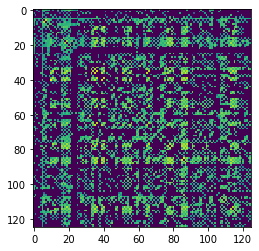

In [36]:
#Plotting the FA weighted connectivity matrix
import matplotlib.pyplot as plt
plt.imshow(data, interpolation = 'nearest')
plt.show()

In [40]:
#View meta data of HCP 
with open('/nfs2/harmonization/raw/HCP/metadata/metadata.json', 'r') as data:
    meta = json.load(data)

In [5]:
#Bundle stats
em = ('/home-local/pipelines/francois_special/OUTPUTS/stats_xlsx/endpoints_map.xlsx')
dfem = pd.read_excel(em)

In [7]:
dfem.T

,0
Unnamed: 0,subject_session
AC_head,1
AC_tail,1
AF_L_head,4976
AF_L_tail,4698
...,...
SLF_R_tail,4680
UF_L_head,5
UF_L_tail,5
UF_R_head,375


In [9]:
ems = ('/home-local/pipelines/francois_special/OUTPUTS/stats_xlsx/endpoints_metric_stats.xlsx')
dfems = pd.read_excel(ems)

In [12]:
dfems.T

,0
Unnamed: 0,subject_session
AC_head,0.000718685
AC_tail,0.000901961
AF_L_head,0.000866855
AF_L_tail,0.000844262
...,...
SLF_R_tail,0.00083351
UF_L_head,0.000802435
UF_L_tail,0.000757118
UF_R_head,0.000837457


In [13]:
ls = ('/home-local/pipelines/francois_special/OUTPUTS/stats_xlsx/length_stats.xlsx')
dfls = pd.read_excel(ls)

In [15]:
dfls

,Unnamed: 0,AC,AF_L,AF_R,CC_Fr_1,CC_Fr_2,CC_Oc,CC_Pa,CC_Pr_Po,CC_Te,...,POPT_L,POPT_R,PYT_L,PYT_R,SCP_L,SCP_R,SLF_L,SLF_R,UF_L,UF_R
0,subject_session,74.425547,37.875738,35.935812,21.624606,27.551729,36.911875,26.547105,26.59722,116.330175,...,44.778424,41.45582,42.285389,38.77957,69.940806,64.872622,26.080773,18.203122,70.917294,65.943781


In [16]:
mspp = ('/home-local/pipelines/francois_special/OUTPUTS/stats_xlsx/mean_std_per_point.xlsx')
dfmspp = pd.read_excel(mspp)

In [17]:
dfmspp

,Unnamed: 0,003,004,005,006,007,008,009,010,011,012,013,014,015,016,017
0,AC,0.000719,0.000668,0.000827,0.001043,0.000929,0.000731,0.000898,0.000569,0.000708,0.000731,0.000814,0.000829,0.000936,0.001078,0.000948
1,AF_L,0.000861,0.000915,0.000990,0.001022,0.000861,0.000712,0.000659,0.000677,0.000649,0.000633,0.000618,0.000668,0.000686,0.000735,0.000717
2,AF_R,0.000881,0.000996,0.001007,0.000998,0.000897,0.000802,0.000811,0.000849,0.000809,0.000743,0.000708,0.000739,0.000735,0.000697,0.000693
3,CC_Fr_1,0.001010,0.000947,0.000901,0.000864,0.000850,0.000959,0.001077,0.001042,0.001020,0.001018,0.000965,0.000886,0.000906,0.000901,0.000972
4,CC_Fr_2,0.000938,0.000923,0.000867,0.000905,0.000990,0.001118,0.001155,0.001007,0.001002,0.001198,0.001106,0.000985,0.000912,0.000870,0.000952
5,CC_Oc,0.001216,0.001285,0.001172,0.001241,0.001124,0.001114,0.001141,0.001184,0.001046,0.001147,0.001111,0.001212,0.001173,0.001177,0.001129
6,CC_Pa,0.000903,0.000873,0.000879,0.000850,0.000989,0.001156,0.001192,0.001164,0.001131,0.001255,0.001216,0.001073,0.000930,0.000914,0.000944
7,CC_Pr_Po,0.000769,0.000850,0.000949,0.000922,0.001002,0.001261,0.001250,0.001029,0.001195,0.001289,0.001158,0.001012,0.000930,0.000880,0.000867
8,CC_Te,0.000960,0.000941,0.000989,0.000931,0.000857,0.000914,0.001033,0.001153,0.001057,0.001009,0.000946,0.000961,0.000949,0.000886,0.000793
9,CG_L,0.000796,0.000860,0.000873,0.000878,0.000947,0.001010,0.001049,0.001012,0.000979,0.000943,0.001012,0.001051,0.001025,0.000976,0.001001


In [18]:
ms = ('/home-local/pipelines/francois_special/OUTPUTS/stats_xlsx/mean_std.xlsx')
dfms = pd.read_excel(ms)

In [19]:
dfms

,Unnamed: 0,AC,AF_L,AF_R,CC_Fr_1,CC_Fr_2,CC_Oc,CC_Pa,CC_Pr_Po,CC_Te,...,POPT_L,POPT_R,PYT_L,PYT_R,SCP_L,SCP_R,SLF_L,SLF_R,UF_L,UF_R
0,subject_session,0.570952,0.498343,0.470323,0.615068,0.623097,0.695857,0.620078,0.609453,0.607129,...,0.556947,0.54725,0.555087,0.547529,0.497612,0.518024,0.510837,0.477644,0.480342,0.473831


In [20]:
sc = ('/home-local/pipelines/francois_special/OUTPUTS/stats_xlsx/streamline_count.xlsx')
dfsc = pd.read_excel(sc)

In [21]:
dfsc

,Unnamed: 0,AC,AF_L,AF_R,CC_Fr_1,CC_Fr_2,CC_Oc,CC_Pa,CC_Pr_Po,CC_Te,...,POPT_L,POPT_R,PYT_L,PYT_R,SCP_L,SCP_R,SLF_L,SLF_R,UF_L,UF_R
0,subject_session,1,14018,23707,41321,27922,12248,18172,11015,72,...,19485,18596,40975,39698,187,275,3899,9878,5,450


In [22]:
vpl = ('/home-local/pipelines/francois_special/OUTPUTS/stats_xlsx/volume_per_label.xlsx')
dfvpl = pd.read_excel(vpl)

In [23]:
dfvpl #Need to look into why there is a NaN value for the AC_labels

,Unnamed: 0,AC_labels_001,AC_labels_002,AC_labels_003,AC_labels_004,AC_labels_005,AC_labels_006,AC_labels_007,AC_labels_008,AC_labels_009,...,UF_R_labels_011,UF_R_labels_012,UF_R_labels_013,UF_R_labels_014,UF_R_labels_015,UF_R_labels_016,UF_R_labels_017,UF_R_labels_018,UF_R_labels_019,UF_R_labels_020
0,subject_session,NaN,NaN,1,7,10,8,7,6,12,...,168,192,268,296,319,365,484,474,509,1576


In [24]:
vols = ('/home-local/pipelines/francois_special/OUTPUTS/stats_xlsx/volumes.xlsx')
dfvols = pd.read_excel(vols)

In [25]:
dfvols

,Unnamed: 0,AC,AF_L,AF_R,CC_Fr_1,CC_Fr_2,CC_Oc,CC_Pa,CC_Pr_Po,CC_Te,...,POPT_L,POPT_R,PYT_L,PYT_R,SCP_L,SCP_R,SLF_L,SLF_R,UF_L,UF_R
0,subject_session,113,41866,61938,48703,56561,41445,54146,46820,6632,...,54125,52035,56024,57866,8753,10692,29264,49012,552,9035
